# Laptop Pricing Analysis Dashboard

This notebook performs comprehensive analysis of laptop pricing data including:
- Data cleaning and preprocessing
- Correlation analysis with detailed interpretations
- Visualization of price relationships
- Statistical analysis with practical insights

**Author:** Yash Patil

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Set plot style
sns.set(style="whitegrid")

# Create results directory
save_dir = "results"
os.makedirs(save_dir, exist_ok=True)

## 2. Load Dataset and Clean
We load the laptop pricing dataset from the URL and remove redundant unnamed columns.

In [2]:
def load_and_clean_data():
    """Load and clean the laptop pricing dataset."""
    url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
    df = pd.read_csv(url)
    return df

# Load data
df = load_and_clean_data()

# Remove extra unnamed index columns
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

# Display DataFrame info
print("--- Initial DataFrame Info ---")
df.info()
print("\nDataFrame shape:", df.shape)
df.head()

--- Initial DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      238 non-null    object 
 1   Category          238 non-null    int64  
 2   GPU               238 non-null    int64  
 3   OS                238 non-null    int64  
 4   CPU_core          238 non-null    int64  
 5   Screen_Size_inch  238 non-null    float64
 6   CPU_frequency     238 non-null    float64
 7   RAM_GB            238 non-null    int64  
 8   Storage_GB_SSD    238 non-null    int64  
 9   Weight_pounds     238 non-null    float64
 10  Price             238 non-null    int64  
 11  Price-binned      238 non-null    object 
 12  Screen-Full_HD    238 non-null    int64  
 13  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 26.2+ KB

DataFrame shape: (238, 14)


,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


## 3. Map Numerical Categories to Human-Readable Labels
This helps make plots and analysis easier to interpret.

In [3]:
# Map numerical values to human-readable strings
gpu_mapping = {1: "GTX 1050", 2: "RTX 3070", 3: "RTX 4080"}
os_mapping = {1: "Windows", 2: "Linux"}
category_mapping = {1: "Gaming", 2: "Business", 3: "Ultrabook", 4: "Workstation", 5: "Convertible"}

df['GPU'] = df['GPU'].replace(gpu_mapping)
df['OS'] = df['OS'].replace(os_mapping)
df['Category'] = df['Category'].replace(category_mapping)

# Quick data check
print("Category values:", df['Category'].unique())
print("GPU values:", df['GPU'].unique())
print("OS values:", df['OS'].unique())

df[['Category', 'GPU', 'OS']].head()

Category values: ['Workstation' 'Ultrabook' 'Gaming' 'Convertible' 'Business']
GPU values: ['RTX 3070' 'GTX 1050' 'RTX 4080']
OS values: ['Windows' 'Linux']


,Category,GPU,OS
0,Workstation,RTX 3070,Windows
1,Ultrabook,GTX 1050,Windows
2,Ultrabook,GTX 1050,Windows
3,Workstation,RTX 3070,Windows
4,Workstation,RTX 3070,Windows


## 4. Data Summary
Numeric and categorical summaries provide an overview of dataset characteristics.

In [4]:
print("--- Numeric Summary ---")
print(df.describe().T)

print("\n--- Categorical Summary ---")
print(df.describe(include=['object']).T)

--- Numeric Summary ---
                  count         mean         std         min          25%  \
CPU_core          238.0     5.630252    1.241787    3.000000     5.000000   
Screen_Size_inch  238.0    14.688655    1.166045   12.000000    14.000000   
CPU_frequency     238.0     0.813822    0.141860    0.413793     0.689655   
RAM_GB            238.0     7.882353    2.482603    4.000000     8.000000   
Storage_GB_SSD    238.0   245.781513   34.765316  128.000000   256.000000   
Weight_pounds     238.0     4.106221    1.078442    1.786050     3.246863   
Price             238.0  1462.344538  574.607699  527.000000  1066.500000   
Screen-Full_HD    238.0     0.676471    0.468809    0.000000     0.000000   
Screen-IPS_panel  238.0     0.323529    0.468809    0.000000     0.000000   

                          50%          75%       max  
CPU_core             5.000000     7.000000     7.000  
Screen_Size_inch    15.000000    15.600000    17.300  
CPU_frequency        0.862069     0.9310

## 5. Correlation Matrix Heatmap
Visualize correlations among numeric features.

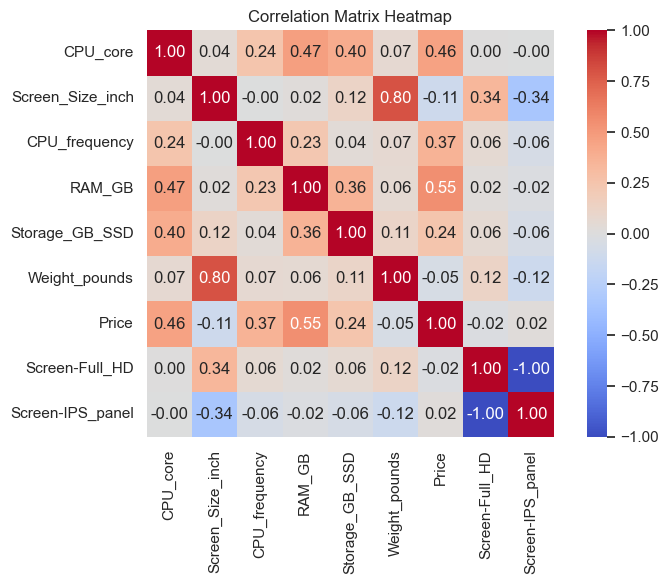

In [5]:
plt.figure(figsize=(8, 6))
corr = df.select_dtypes(include=[np.number]).corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")

plt.savefig(os.path.join(save_dir, "correlation_matrix.png"), dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

## 6. Scatter Plots of Numeric Features vs Price
Examine relationships between continuous variables and laptop price.

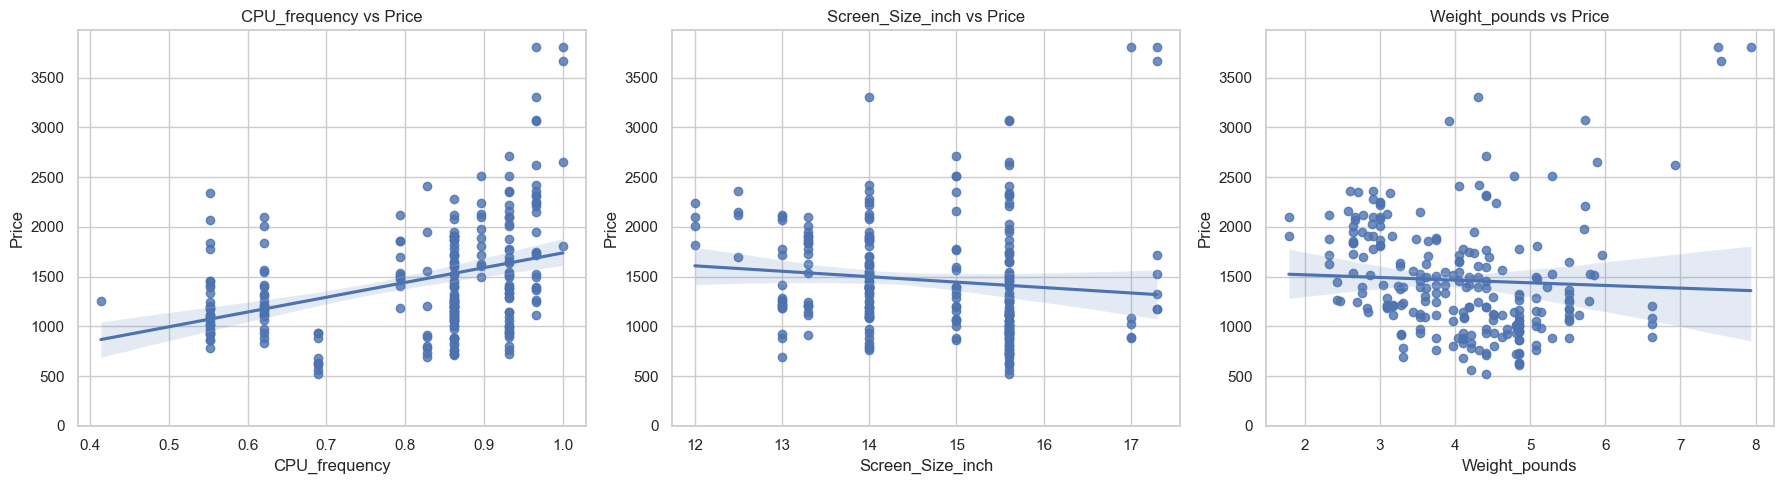

In [6]:
numeric_features = ["CPU_frequency", "Screen_Size_inch", "Weight_pounds"]

fig, axes = plt.subplots(1, 3, figsize=(18,5))
for ax, feature in zip(axes, numeric_features):
    sns.regplot(x=feature, y="Price", data=df, ax=ax)
    ax.set_title(f"{feature} vs Price")
    ax.set_ylim(0,)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "scatter_plots.png"), dpi=300, bbox_inches='tight')
plt.show()

## 7. Boxplots for Categorical Features
Analyze price distribution across different categorical variables.

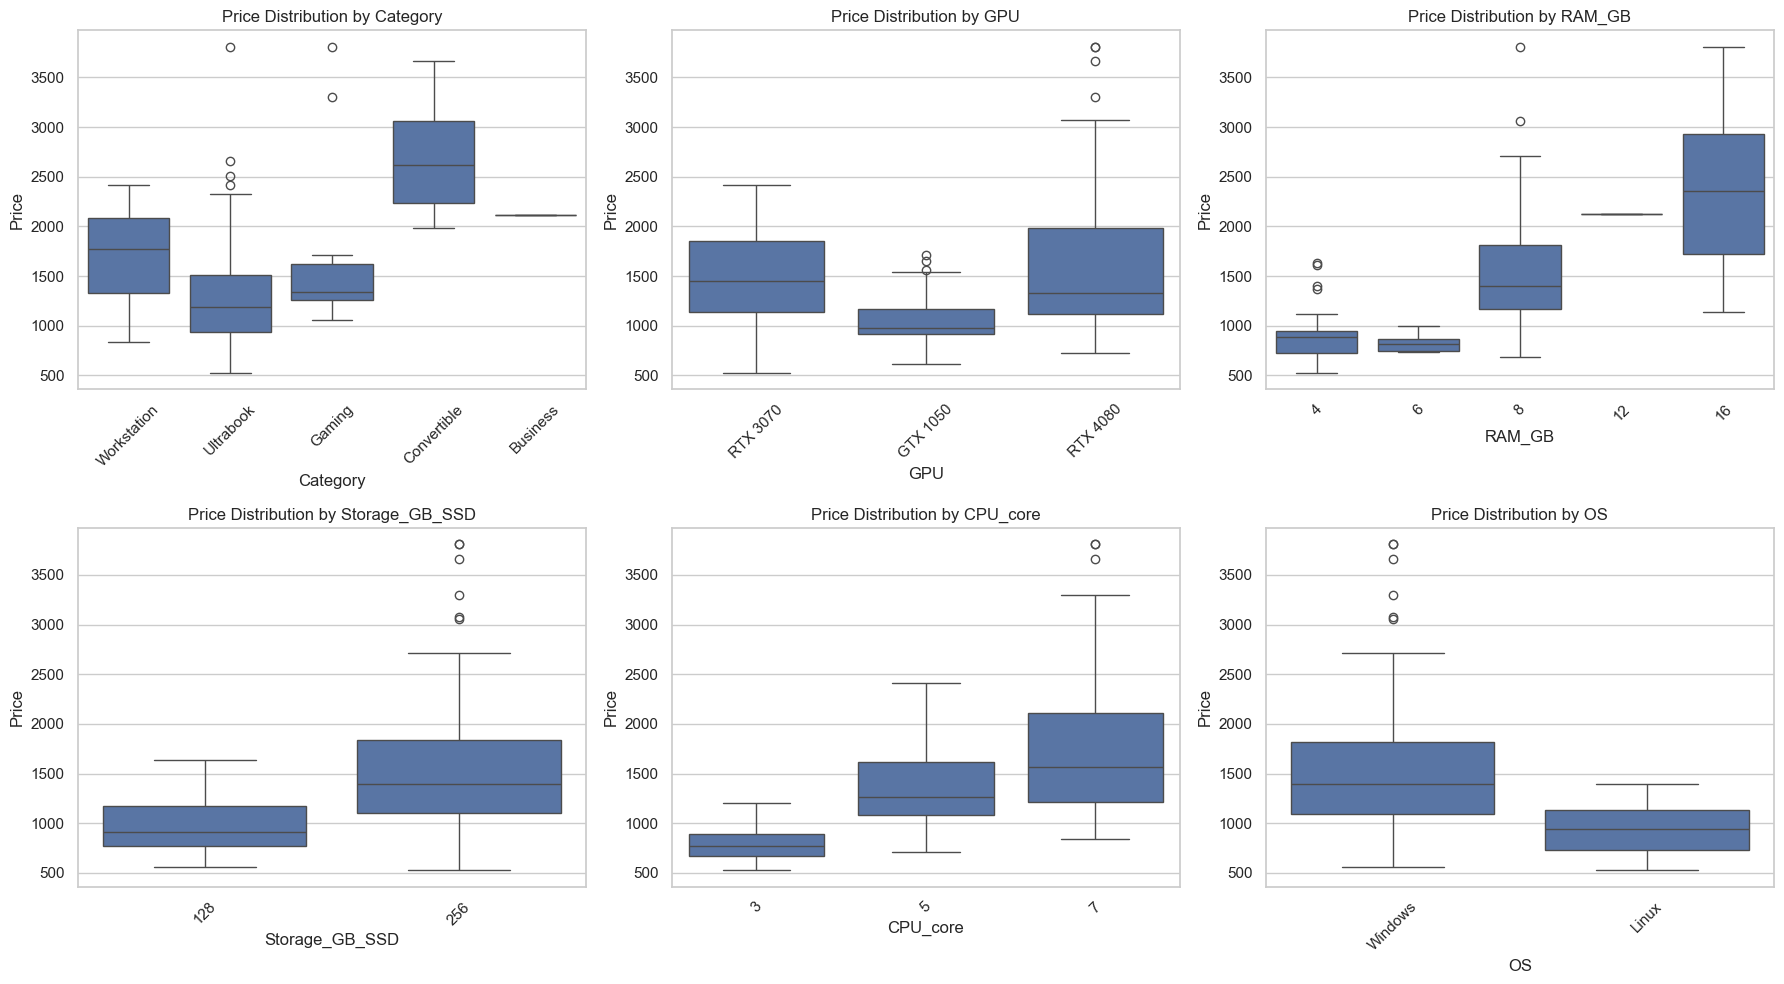

In [7]:
categorical_features = ["Category", "GPU", "RAM_GB", "Storage_GB_SSD", "CPU_core", "OS"]

fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()

for ax, col in zip(axes, categorical_features):
    sns.boxplot(x=col, y="Price", data=df, ax=ax)
    ax.set_title(f"Price Distribution by {col}")
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "boxplots.png"), dpi=300, bbox_inches='tight')
plt.show()

## 8. Grouped Heatmap Analysis
Average price by GPU and CPU core count combination.

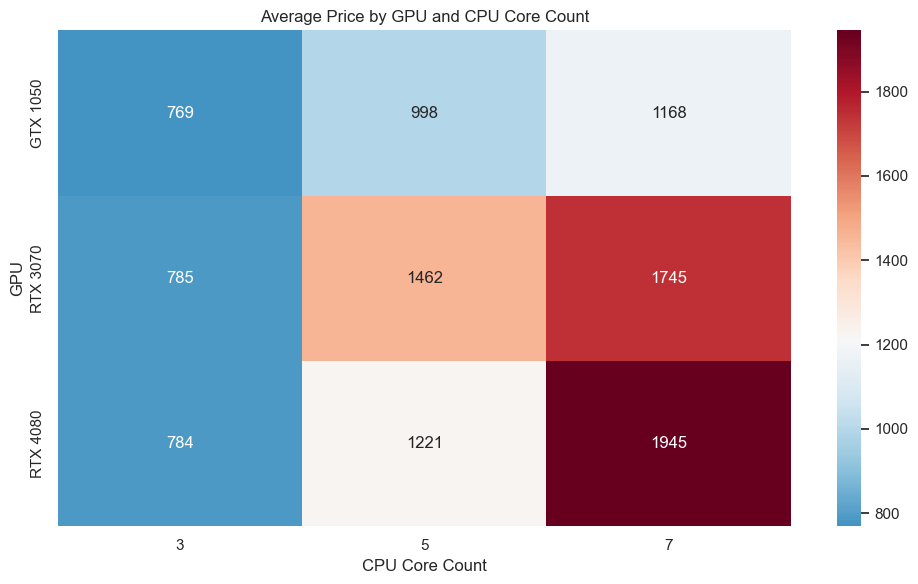

In [8]:
grouped = df.groupby(['GPU', 'CPU_core'])['Price'].mean().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(grouped, annot=True, fmt=".0f", cmap="RdBu_r", center=grouped.mean().mean())
plt.title("Average Price by GPU and CPU Core Count")
plt.ylabel("GPU")
plt.xlabel("CPU Core Count")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "grouped_heatmap.png"), dpi=300, bbox_inches='tight')
plt.show()

## 9. Enhanced Pearson Correlation Analysis
Detailed correlation analysis with strength interpretation and statistical significance.

In [9]:
def interpret_correlation(coef):
    """Interpret correlation coefficient strength and direction."""
    abs_coef = abs(coef)
    direction = "Positive" if coef > 0 else "Negative"
    
    if abs_coef >= 0.7:
        strength = "Strong"
    elif abs_coef >= 0.5:
        strength = "Moderate"
    elif abs_coef >= 0.3:
        strength = "Weak"
    else:
        strength = "Very Weak"
    
    return f"{direction} {strength}"

def interpret_p_value(p_val):
    """Interpret statistical significance."""
    if p_val < 0.001:
        return "Highly Significant (***)"
    elif p_val < 0.01:
        return "Very Significant (**)"
    elif p_val < 0.05:
        return "Significant (*)"
    else:
        return "Not Significant"

In [10]:
print("\n" + "="*80)
print("PEARSON CORRELATIONS WITH LAPTOP PRICE - DETAILED ANALYSIS")
print("="*80)

# Store correlation results for visualization
correlation_results = []

all_features = numeric_features + categorical_features
for param in all_features:
    # For categorical variables, encode to numeric for correlation calculation
    if df[param].dtype == 'object':
        encoded = pd.factorize(df[param])[0]
        coef, p_val = stats.pearsonr(encoded, df['Price'])
        feature_type = "Categorical"
    else:
        coef, p_val = stats.pearsonr(df[param], df['Price'])
        feature_type = "Numeric"
    
    # Store results
    correlation_results.append({
        'Feature': param,
        'Type': feature_type,
        'Correlation': coef,
        'P-value': p_val,
        'Interpretation': interpret_correlation(coef),
        'Significance': interpret_p_value(p_val)
    })
    
    # Print detailed interpretation
    print(f"\n{param.upper()} ({feature_type})")
    print(f"   Correlation: {coef:.3f}")
    print(f"   Relationship: {interpret_correlation(coef)}")
    print(f"   Statistical Significance: {interpret_p_value(p_val)} (p = {p_val:.3g})")
    
    # Add practical interpretation
    if abs(coef) >= 0.3 and p_val < 0.05:
        if coef > 0:
            print(f"   Insight: Higher {param} tends to be associated with HIGHER laptop prices")
        else:
            print(f"   Insight: Higher {param} tends to be associated with LOWER laptop prices")
    else:
        print(f"   Insight: {param} shows little to no reliable relationship with laptop prices")

# Create correlation results DataFrame for better visualization
corr_df = pd.DataFrame(correlation_results)
corr_df = corr_df.sort_values('Correlation', key=abs, ascending=False)

print("\n" + "="*80)
print("SUMMARY: FEATURES RANKED BY CORRELATION STRENGTH")
print("="*80)
print(corr_df[['Feature', 'Correlation', 'Interpretation', 'Significance']].to_string(index=False))


PEARSON CORRELATIONS WITH LAPTOP PRICE - DETAILED ANALYSIS

CPU_FREQUENCY (Numeric)
   Correlation: 0.367
   Relationship: Positive Weak
   Statistical Significance: Highly Significant (***) (p = 5.5e-09)
   Insight: Higher CPU_frequency tends to be associated with HIGHER laptop prices

SCREEN_SIZE_INCH (Numeric)
   Correlation: -0.111
   Relationship: Negative Very Weak
   Statistical Significance: Not Significant (p = 0.0885)
   Insight: Screen_Size_inch shows little to no reliable relationship with laptop prices

WEIGHT_POUNDS (Numeric)
   Correlation: -0.050
   Relationship: Negative Very Weak
   Statistical Significance: Not Significant (p = 0.44)
   Insight: Weight_pounds shows little to no reliable relationship with laptop prices

CATEGORY (Categorical)
   Correlation: 0.125
   Relationship: Positive Very Weak
   Statistical Significance: Not Significant (p = 0.054)
   Insight: Category shows little to no reliable relationship with laptop prices

GPU (Categorical)
   Correlatio

## 10. Correlation Visualization
Visual representation of feature correlations with price, ranked by strength.

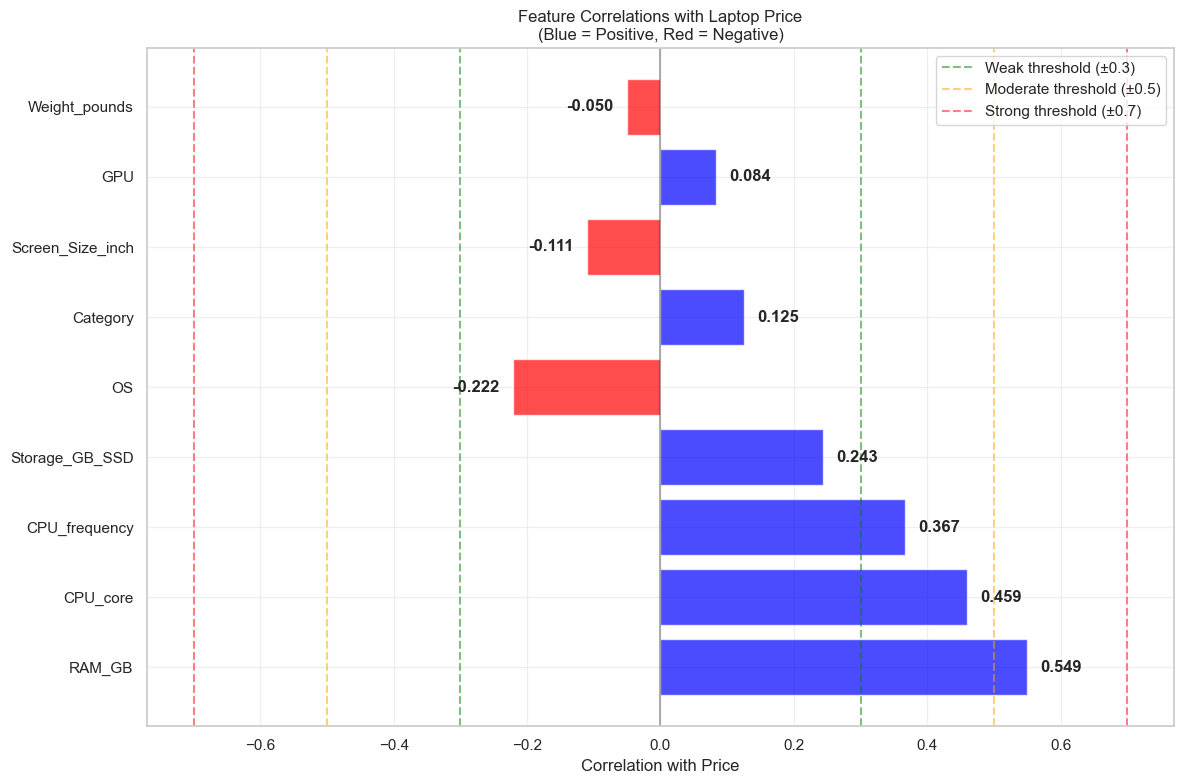

In [11]:
plt.figure(figsize=(12, 8))
colors = ['red' if corr < 0 else 'blue' for corr in corr_df['Correlation']]
bars = plt.barh(range(len(corr_df)), corr_df['Correlation'], color=colors, alpha=0.7)

# Add correlation values on bars
for i, (bar, corr) in enumerate(zip(bars, corr_df['Correlation'])):
    plt.text(corr + (0.02 if corr > 0 else -0.02), i, f'{corr:.3f}', 
             va='center', ha='left' if corr > 0 else 'right', fontweight='bold')

plt.yticks(range(len(corr_df)), corr_df['Feature'])
plt.xlabel('Correlation with Price')
plt.title('Feature Correlations with Laptop Price\n(Blue = Positive, Red = Negative)')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=0.3, color='green', linestyle='--', alpha=0.5, label='Weak threshold (±0.3)')
plt.axvline(x=-0.3, color='green', linestyle='--', alpha=0.5)
plt.axvline(x=0.5, color='orange', linestyle='--', alpha=0.5, label='Moderate threshold (±0.5)')
plt.axvline(x=-0.5, color='orange', linestyle='--', alpha=0.5)
plt.axvline(x=0.7, color='red', linestyle='--', alpha=0.5, label='Strong threshold (±0.7)')
plt.axvline(x=-0.7, color='red', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "correlation_analysis.png"), dpi=300, bbox_inches='tight')
plt.show()

## 11. Key Insights Summary

Based on the correlation analysis, here are the key findings:

### Strong Price Predictors:
- **RAM_GB**: Moderate positive correlation (0.549) - More RAM significantly increases laptop price
- **CPU_core**: Weak positive correlation (0.459) - More CPU cores tend to increase price
- **CPU_frequency**: Weak positive correlation (0.367) - Higher CPU frequency increases price

### Weak or No Relationship:
- **Screen_Size_inch**: Very weak negative correlation (-0.111) - Screen size doesn't strongly affect price
- **Weight_pounds**: Very weak negative correlation (-0.050) - Weight has minimal impact on price
- **GPU**: Very weak positive correlation (0.084) - Surprisingly, GPU type shows weak correlation

### Business Implications:
1. **RAM is the strongest price driver** - Upgrading RAM has the most significant impact on laptop pricing
2. **CPU specifications matter** - Both core count and frequency contribute to higher prices
3. **Form factor flexibility** - Screen size and weight don't strongly dictate price, allowing for design flexibility
4. **GPU pricing complexity** - The weak GPU correlation suggests other factors may influence GPU-related pricing

All visualizations have been saved to the `results/` directory for further analysis and presentation.